# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

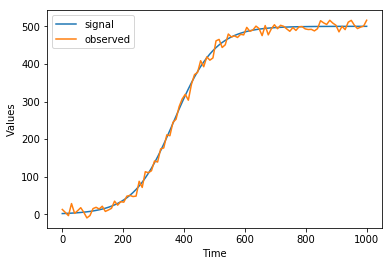

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedSampling(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested Ellipsoidal Rejection sampler
Number of active points: 1000
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z)
0     1       0:00.0 -inf        
0     2       0:00.0 -inf        
0     3       0:00.0 -inf        
0     4       0:00.0 -inf        
0     5       0:00.0 -inf        
0     21      0:00.0 -inf        
0     41      0:00.0 -inf        
0     61      0:00.0 -inf        
0     81      0:00.0 -inf        
0     101     0:00.0 -inf        
0     121     0:00.0 -inf        
0     141     0:00.0 -inf        
0     161     0:00.0 -inf        
0     181     0:00.0 -inf        
0     201     0:00.0 -inf        
0     221     0:00.0 -inf        
0     241     0:00.0 -inf        
0     261     0:00.0 -inf        
0     281     0:00.0 -inf        
0     301     0:00.0 -inf        
0     321     0:00.0 -inf        
0     341     0:00.0 -inf        
0     361     0:00.0 -inf        
0     381     0:00.0 -inf        
0 

C:\Users\bclamber\Desktop\pints\pints\_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1820  1697    0:00.9 -1763.906624
1840  1723    0:00.9 -1718.74805 
1860  1743    0:00.9 -1673.495882
1880  1763    0:00.9 -1626.696323
1900  1796    0:01.0 -1587.413508
1920  1814    0:01.0 -1560.972733
1940  1835    0:01.0 -1517.223238
1960  1865    0:01.0 -1476.847127
1980  1892    0:01.1 -1447.960545
2000  1913    0:01.1 -1413.856646
2020  1933    0:01.1 -1391.243613
2040  1971    0:01.1 -1358.982272
2060  1999    0:01.2 -1314.271859
2080  2036    0:01.2 -1285.726078
2100  2064    0:01.2 -1245.859476
2120  2087    0:01.3 -1206.393397
2140  2132    0:01.3 -1178.619312
2160  2161    0:01.3 -1139.642511
2180  2201    0:01.3 -1122.717875
2200  2211    0:01.4 -1100.488223
2220  2242    0:01.4 -1076.790704
2240  2268    0:01.4 -1055.757847
2260  2306    0:01.5 -1035.643664
2280  2335    0:01.5 -1015.072221
2300  2365    0:01.5 -996.9223266
2320  2398    0:01.5 -976.6262128
2340  2438    0:01.6 -954.4112626
2360  2457    0:01.6 -935.271168 
2380  2497    0:01.6 -914.1359547
2400  2525    

6640  7923    0:06.8 -126.9503789
6660  7935    0:06.9 -126.3213301
6680  7944    0:06.9 -125.662739 
6700  7953    0:06.9 -124.8604912
6720  7963    0:06.9 -124.0672315
6740  7972    0:06.9 -123.3393843
6760  7982    0:07.0 -122.604152 
6780  7991    0:07.0 -121.9066426
6800  8003    0:07.0 -121.1696076
6820  8023    0:07.0 -120.3307012
6840  8034    0:07.0 -119.5883565
6860  8045    0:07.1 -118.8033228
6880  8055    0:07.1 -118.1320405
6900  8067    0:07.1 -117.3855614
6920  8080    0:07.1 -116.5932805
6940  8085    0:07.2 -115.8012004
6960  8099    0:07.2 -115.0098773
6980  8109    0:07.2 -114.1622952
7000  8121    0:07.2 -113.4321941
7020  8134    0:07.2 -112.7605124
7040  8158    0:07.3 -112.0519176
7060  8168    0:07.3 -111.4514079
7080  8183    0:07.3 -110.877538 
7100  8193    0:07.3 -110.2955414
7120  8206    0:07.4 -109.7409423
7140  8218    0:07.4 -109.2003551
7160  8244    0:07.4 -108.6232573
7180  8254    0:07.4 -108.0764422
7200  8267    0:07.5 -107.5441107
7220  8283    

## Plot posterior samples versus true parameter values (dashed lines)

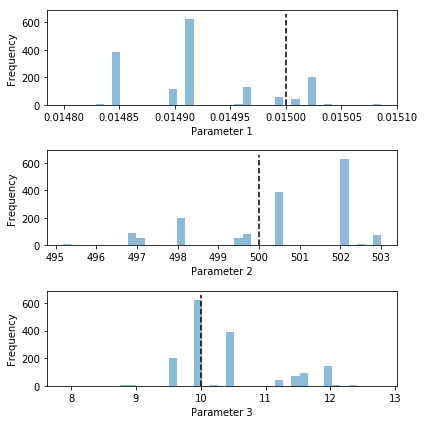

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

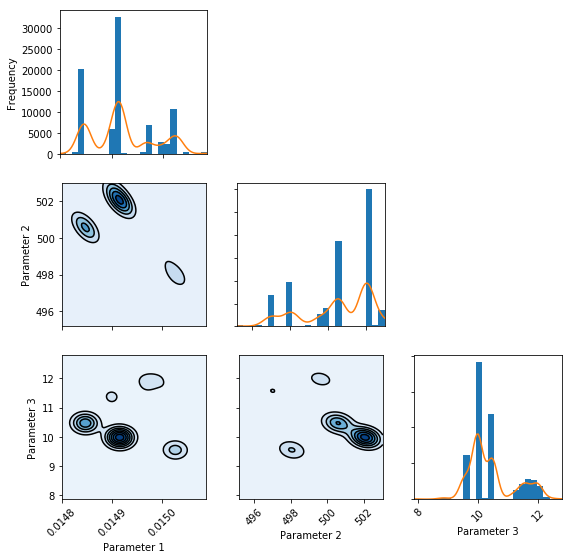

In [5]:
vTheta = samples[0]
pints.plot.pairwise(samples, kde=True)

plt.show()

## Plot posterior predictive simulations versus the observed data

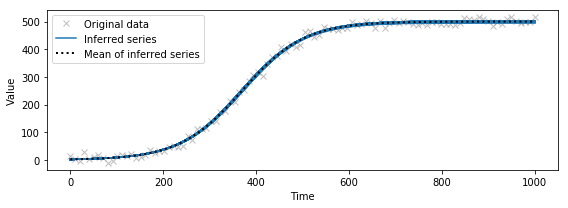

In [6]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [7]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -387.193850622 ± 0.0519796264518


## Effective sample size

In [8]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 6.24630464932


In [9]:
-float('Inf')

-inf